# Quantum Walk on Line with 16 Nodes

Instructions for this assignment can be found here:
https://github.com/Classiq/classiq-library/blob/main/community/womanium/assignments/assignment_4.md

The starter code can be found here: https://github.com/Classiq/classiq-library/blob/main/community/womanium/assignments/quantum_walk_circle_example.py

In [1]:
# Import necessary packages
from classiq import *
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
num_nodes_on_line = 16 # This number is given to us in the problem statement

size = int(math.log2(num_nodes_on_line)) # If our number line has 16 nodes, the size needed is n such that 2**n = 16

In [3]:
# Defining the various functions necessary for this assignment

@qfunc
# Function to prepare the minus state
def prepare_minus(x: QBit):
    # Flip from 0 state to 1
    X(x)
    # Minus state
    H(x)


@qfunc
# Function that is applied if x is not equal to 0
def diffuser_oracle(aux: Output[QNum], x: QNum):
    aux^=(x!=0) # Apply XOR to auxiliary qubit if the value of x is not 0


@qfunc
# Function to apply diffuser oracle with the minus state
def zero_diffuser(x: QNum):
    aux = QNum('aux')
    allocate(1, aux)
    within_apply(compute=lambda: prepare_minus(aux),
                action=lambda: diffuser_oracle)


# Walk Iteration to determine probability we walk up or donw number line and perform the appropriate computations
def W_iteration(i:int, vertices: QNum, adjacent_vertices: QNum):
    prob = list([0]*num_nodes_on_line) # We want to start by initializing a list of 0's to represent the probability of moving to any node on the line
    if i == 0: # If i is the first node on the line...
        prob[i+1] = 1 # the only direction we can move is up 1 step to 1.
    elif i == len(prob) - 1: # If i is the last node on the lin...
        prob[i-1] = 1 # the only direction we can move is down 1 step to i-1.
    else:
        prob[i+1] = 0.5 # Otherwise, there is an equal chance of moving up by 1...
        prob[i-1] = 0.5 # or down by 1.
    print(f'State={i}, prob vec ={prob}')
    control(ctrl = vertices==i,
            operand = lambda: within_apply(
                  compute = lambda: inplace_prepare_state(probabilities=prob, bound=0.01, target=adjacent_vertices),
                  action = lambda: zero_diffuser(adjacent_vertices)))


# Walk Operator that implements the W iteration defined above
@qfunc 
def W_operator(vertices: QNum, adjacent_vertices: QNum):
    for i in range(2**size):
          W_iteration(i, vertices, adjacent_vertices)


# Edge Oracle
@qfunc
# Determines whether or not there is an edge between 2 nodes
def edge_oracle(res: Output[QBit], vertices: QNum, adjacent_vertices: QNum):
    # Because we have a number line, if the difference between 2 vertices is 1, there is an edge connecting them
    res |= ((vertices - adjacent_vertices) == 1) | ((adjacent_vertices - vertices) == 1) # bitwise OR
          

# Bitwise Swap Function
@qfunc 
# Swaps x and y bits
def bitwise_swap(x: QArray[QBit], y: QArray[QBit]):
    repeat(count= x.len,
            iteration= lambda i: SWAP(x[i],y[i]))


# Swap Operator
@qfunc 
# Executes swap function defined above, taking into account edges
def S_operator(vertices: QNum, adjacent_vertices: QNum):
    res = QNum('res')
    edge_oracle(res, vertices, adjacent_vertices)
    control(ctrl = res==1,
        operand = lambda: bitwise_swap(vertices,adjacent_vertices))


# Main function that utilizes S and W operators to execute functions defined above
@qfunc 
def main(vertices: Output[QNum], adjacent_vertices: Output[QNum]):

    allocate(size,vertices)
    hadamard_transform(vertices)
    allocate(size,adjacent_vertices)
    
    W_operator(vertices,adjacent_vertices)
    S_operator(vertices,adjacent_vertices)


qmod = create_model(main) # Creating a model 
qprog = synthesize(qmod) # Synthesizing the model
show(qprog) # Opening the Classiq platform to view the circuit

State=0, prob vec =[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=1, prob vec =[0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=2, prob vec =[0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=3, prob vec =[0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=4, prob vec =[0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=5, prob vec =[0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=6, prob vec =[0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
State=7, prob vec =[0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0]
State=8, prob vec =[0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0]
State=9, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0]
State=10, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0]
State=11, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0]
State=12, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0]
State=13, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 

Note: Program mapped in Classiq may change slightly each time the code above is run.

Example 1

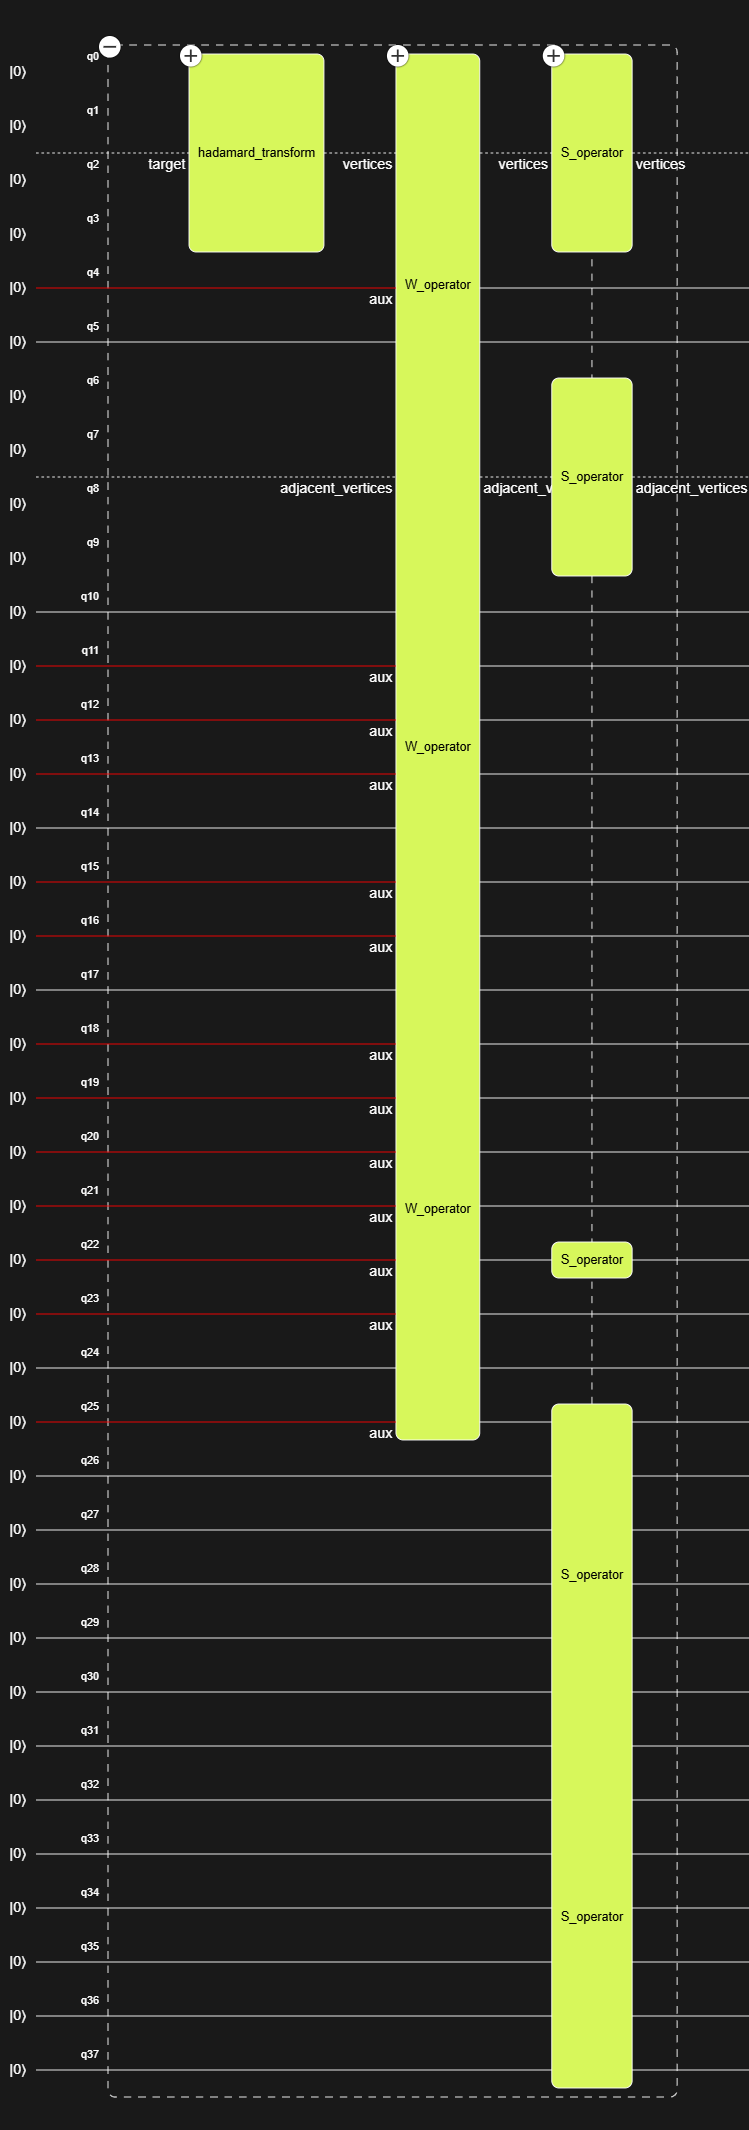

Example 2

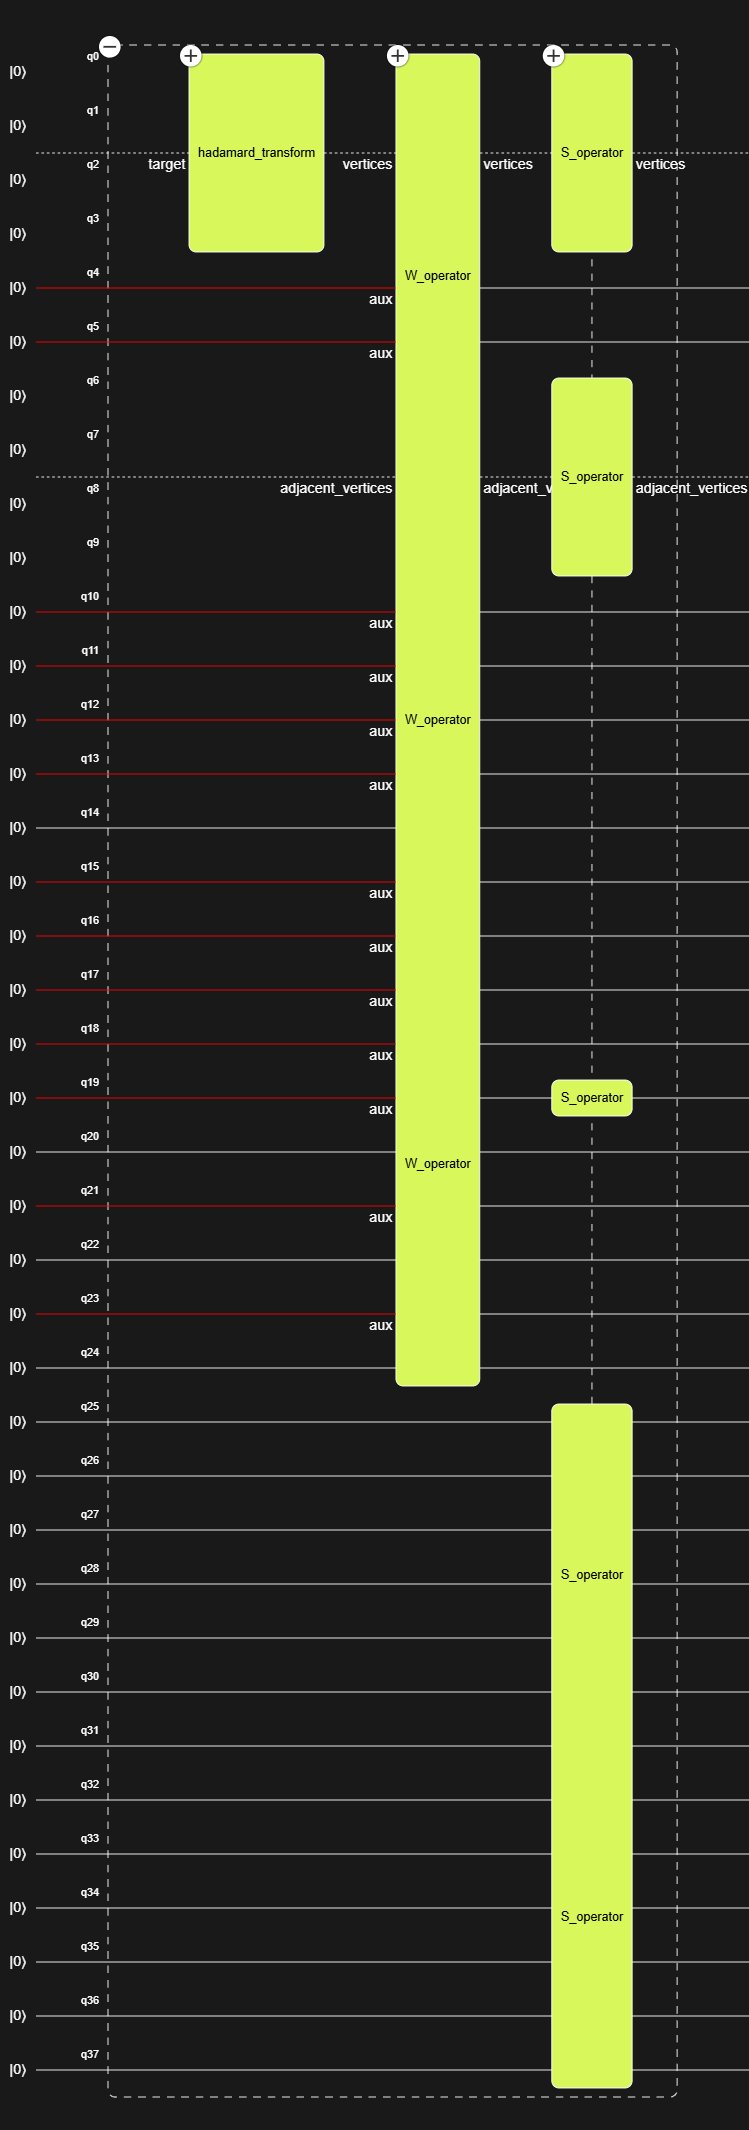